# **Business Understanding**
SyriaTel, a leading telecommunications company, faces a significant challenge in retaining its customer base. Customer churn, or the loss of customers to competitors, can have a substantial impact on the company's revenue and profitability. Acquiring new customers is generally more expensive than retaining existing ones, making customer retention a critical aspect of SyriaTel's business strategy.

In the highly competitive telecommunications market, customers have numerous options and can easily switch to other service providers if they are dissatisfied with the quality of service, pricing, or other factors. Identifying customers at risk of churning and taking proactive measures to address their concerns can significantly improve customer loyalty and reduce the potential revenue loss associated with churn.

**Main Objective**

To develop a binary classification model that can accurately predict whether a customer will stop doing business with SyriaTel in the near future.

# **Data Understanding**

The dataset "Churn in Telecoms Dataset" is provided by Kaggle and contains information about customer churn in the telecommunications industry. Customer churn refers to the situation when customers stop doing business with a company, in this case, a telecommunications provider. Understanding the factors that contribute to customer churn is crucial for companies to develop effective retention strategies and minimize revenue loss.

**Data Source**
The dataset was originally shared on Kaggle by the user "becksddf" and is available at the following link: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

**Data Description**

The dataset contains 3333 rows and 21 columns. Each row represents a unique customer, and the columns provide various attributes related to the customer's account details, usage patterns, and churn status. The dataset consists of the following columns:

state: The state where the customer resides.
account_length: The number of months the customer has been with the company.
area_code: The area code of the customer's phone number.
phone_number: The customer's phone number.
international_plan: Indicates whether the customer has an international calling plan (Yes or No).
voice_mail_plan: Indicates whether the customer has a voice mail plan (Yes or No).
number_vmail_messages: The number of voice mail messages the customer has received.
total_day_minutes: The total number of minutes the customer has spent on calls during the day.
total_day_calls: The total number of calls the customer has made during the day.
total_day_charge: The total charge for the customer's day calls.
total_eve_minutes: The total number of minutes the customer has spent on calls during the evening.
total_eve_calls: The total number of calls the customer has made during the evening.
total_eve_charge: The total charge for the customer's evening calls.
total_night_minutes: The total number of minutes the customer has spent on calls during the night.
total_night_calls: The total number of calls the customer has made during the night.
total_night_charge: The total charge for the customer's night calls.
total_intl_minutes: The total number of minutes the customer has spent on international calls.
total_intl_calls: The total number of international calls the customer has made.
total_intl_charge: The total charge for the customer's international calls.
customer_service_calls: The number of customer service calls the customer has made.
churn: Indicates whether the customer has churned (TRUE or FALSE ).







# **Exploratory Data Analysis**

In [67]:
# numpy for high-level mathematical functions on arrays
import numpy as np
# pandas for tablular data analysis and manipulation
import pandas as pd
# seaborn and matplotlib for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#sklearn preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


**Loading the Dataset**

In [3]:
# Load the entire Excel file
df = pd.read_excel('Dataset.xlsx')

# Print the loaded data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Checking for Missing Values**

In [6]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Checking for Duplicates**

In [7]:
# Check for duplicates in the entire DataFrame
duplicates = df[df.duplicated()]

# Print summary report
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
    print("\nTotal number of duplicate rows:", len(duplicates))
else:
    print("No duplicate rows found.")


No duplicate rows found.


### **Univariate Analysis**

**Categorical**

Distribution of Target Variable:


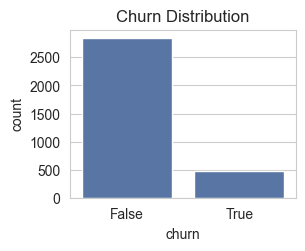

In [56]:
print("Distribution of Target Variable:")

# Plotting the churn distribution using Seaborn
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.tight_layout
plt.show()


**Numerical**

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


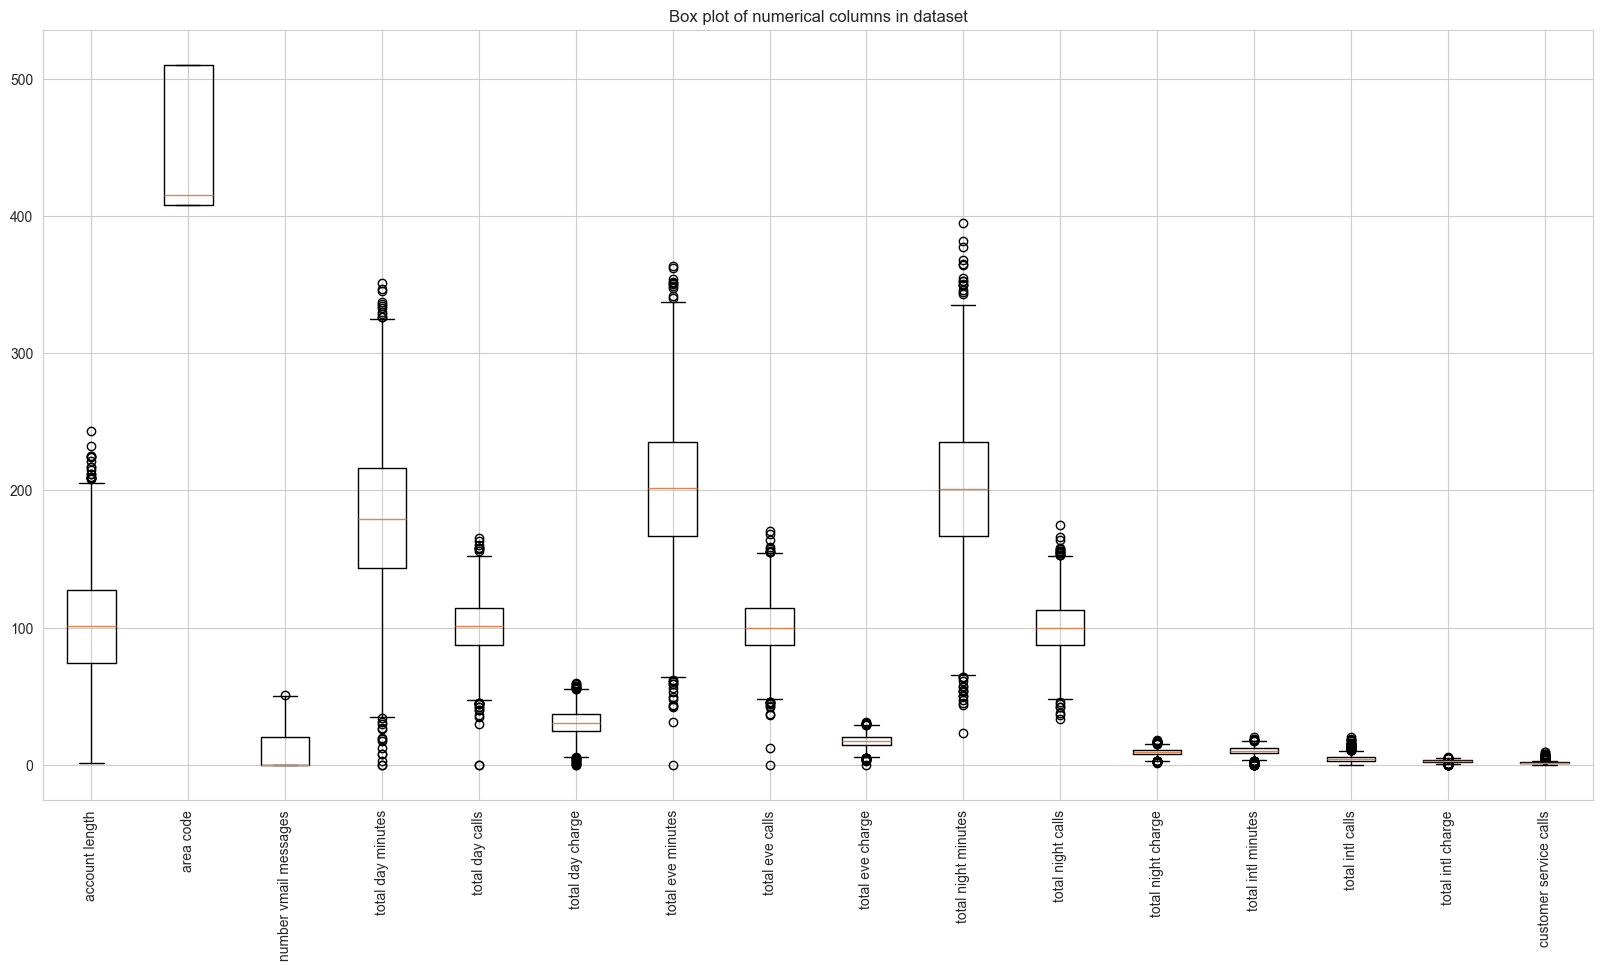

In [42]:
# Explore the dataset
display(df.describe())

# Create a box plot for numerical columns
plt.figure(figsize=(20, 10))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.boxplot([df[col] for col in numerical_cols])
plt.title("Box plot of numerical columns in dataset")
plt.xticks(range(1, len(numerical_cols) + 1), numerical_cols, rotation=90)
plt.show()

**Checking for Outliers**

In [11]:
# Calculate IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each numerical column
outliers = {}
total_outliers = 0
for col in numerical_cols:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])][col]
    total_outliers += len(outliers[col])

# Print summary report for columns with outliers
print("Summary Report for Outliers:")
for col, values in outliers.items():
    if not values.empty:
        print(f"\n{col}:", len(values))

# Print total number of outliers across all numerical columns
print("\nTotal number of outliers across all numerical columns:", total_outliers)


Summary Report for Outliers:

account length: 18

number vmail messages: 1

total day minutes: 25

total day calls: 23

total day charge: 25

total eve minutes: 24

total eve calls: 20

total eve charge: 24

total night minutes: 30

total night calls: 22

total night charge: 30

total intl minutes: 46

total intl calls: 78

total intl charge: 49

customer service calls: 267

Total number of outliers across all numerical columns: 682


### **Bivariate Analysis**

**a)Plan Vs Churn**

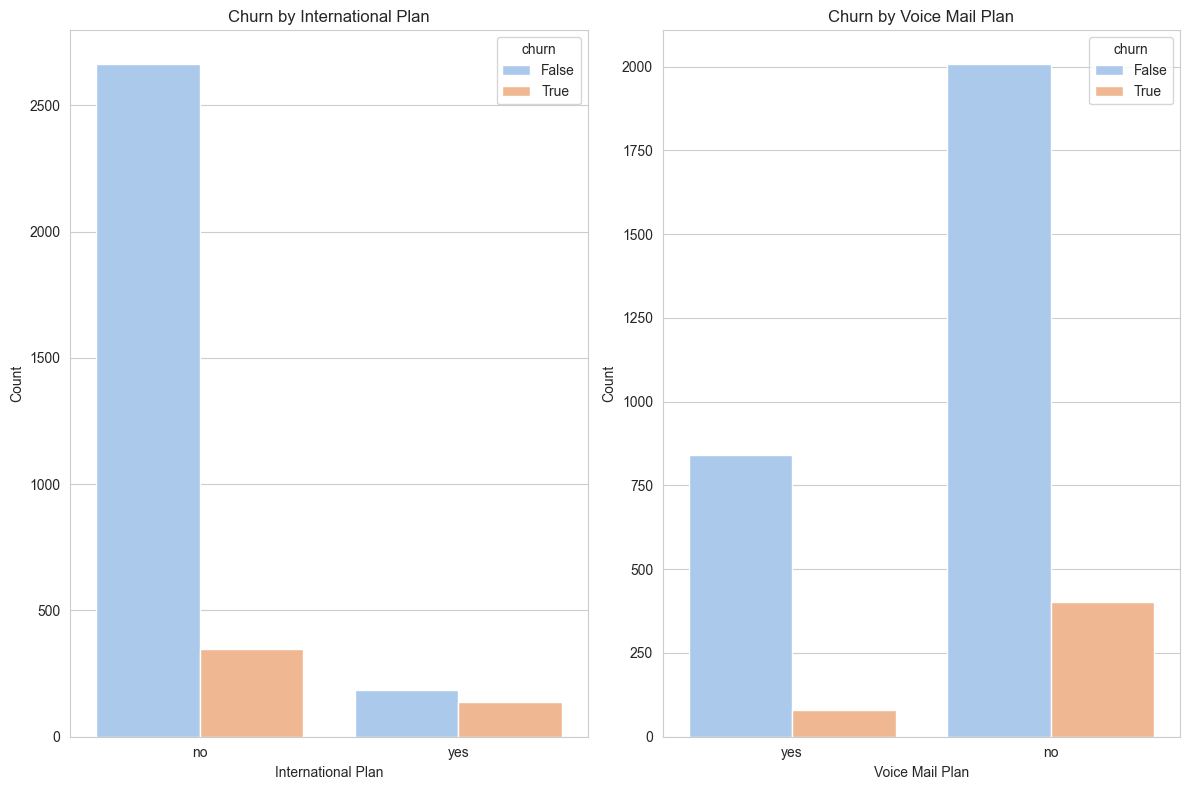

In [64]:
# Set style for plots
sns.set_style("whitegrid")

# Set the custom color palette
sns.set_palette('deep')

# Set up subplots
plt.figure(figsize=(12, 8))

# International Plan vs. Churn
plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=df, palette="pastel")
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')

# Voice Mail Plan vs. Churn
plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=df, palette="pastel")
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()


**b)Total Minutes Vs Churn**

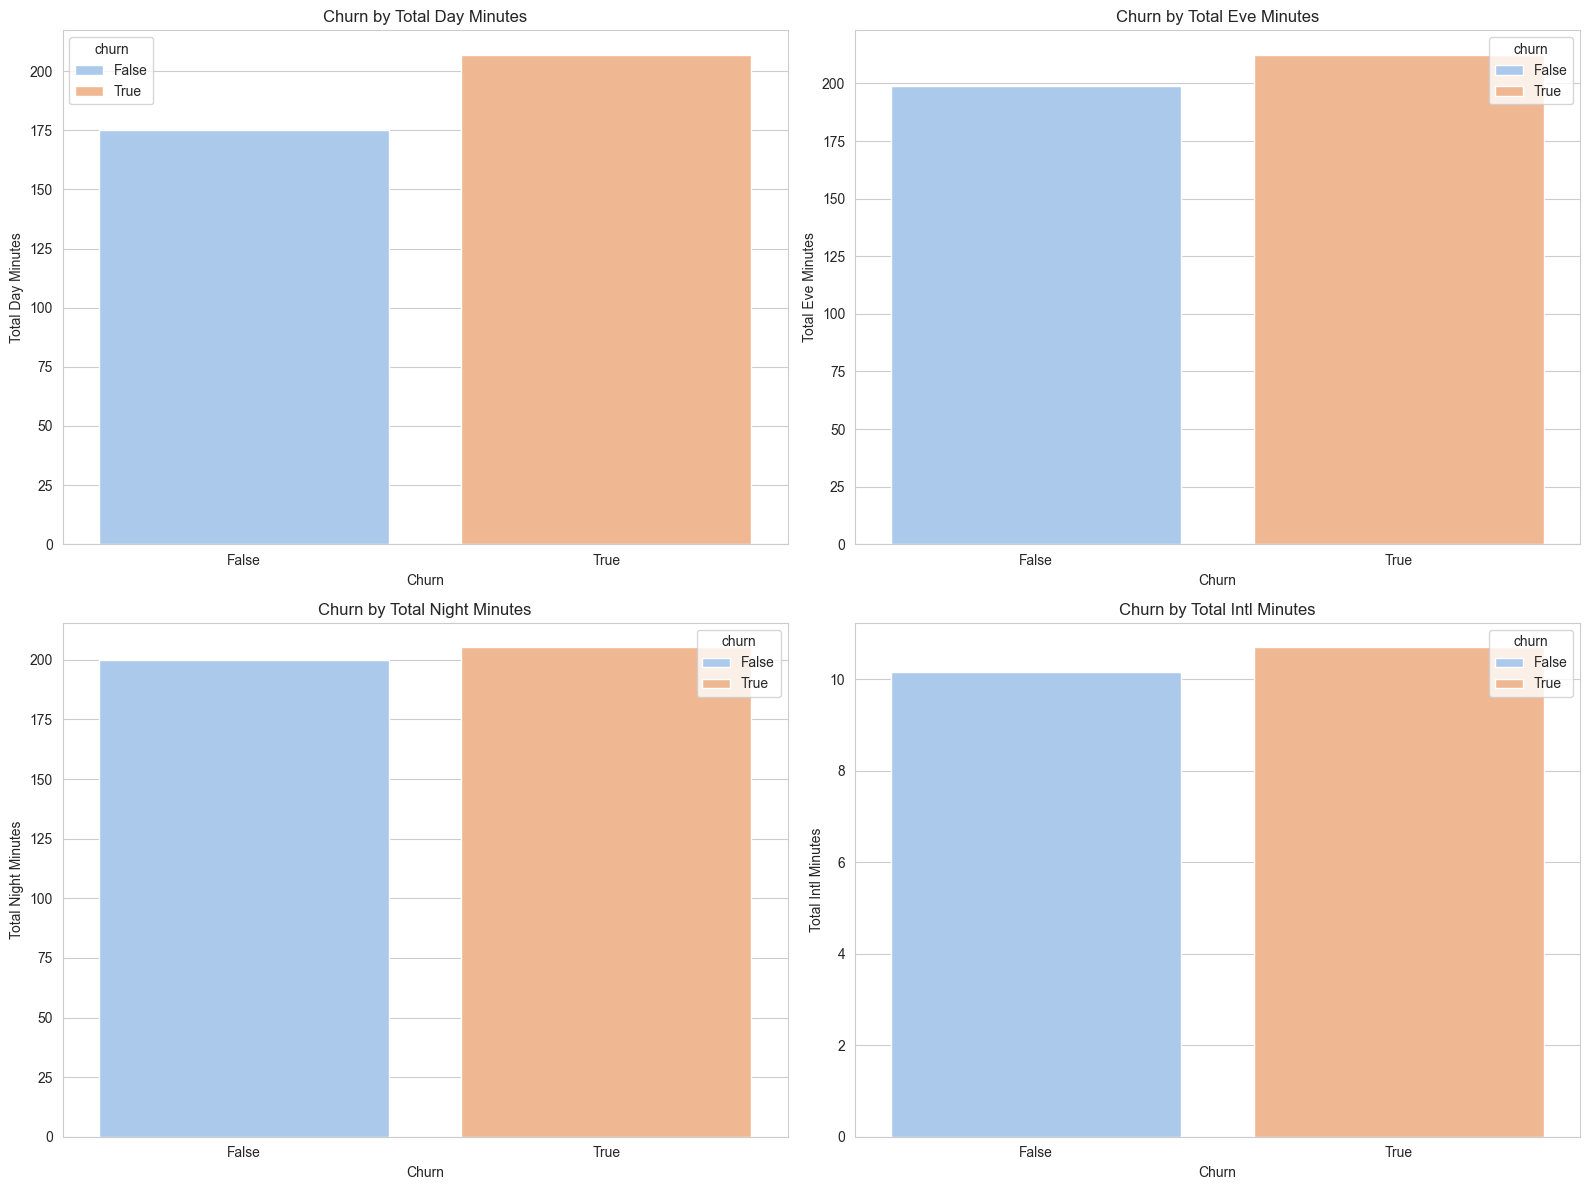

In [65]:
# Set style for plots
sns.set_style("whitegrid")

# Set up subplots
plt.figure(figsize=(16, 12))

# Total Day Minutes vs. Churn
plt.subplot(2, 2, 1)
sns.barplot(x='churn', y='total day minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')

# Total Eve Minutes vs. Churn
plt.subplot(2, 2, 2)
sns.barplot(x='churn', y='total eve minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Eve Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Eve Minutes')

# Total Night Minutes vs. Churn
plt.subplot(2, 2, 3)
sns.barplot(x='churn', y='total night minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Night Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Night Minutes')

# Total Intl Minutes vs. Churn
plt.subplot(2, 2, 4)
sns.barplot(x='churn', y='total intl minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Intl Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Intl Minutes')

# Adjust layout
plt.tight_layout()

plt.show()


**c)Total Charge Vs Churn**

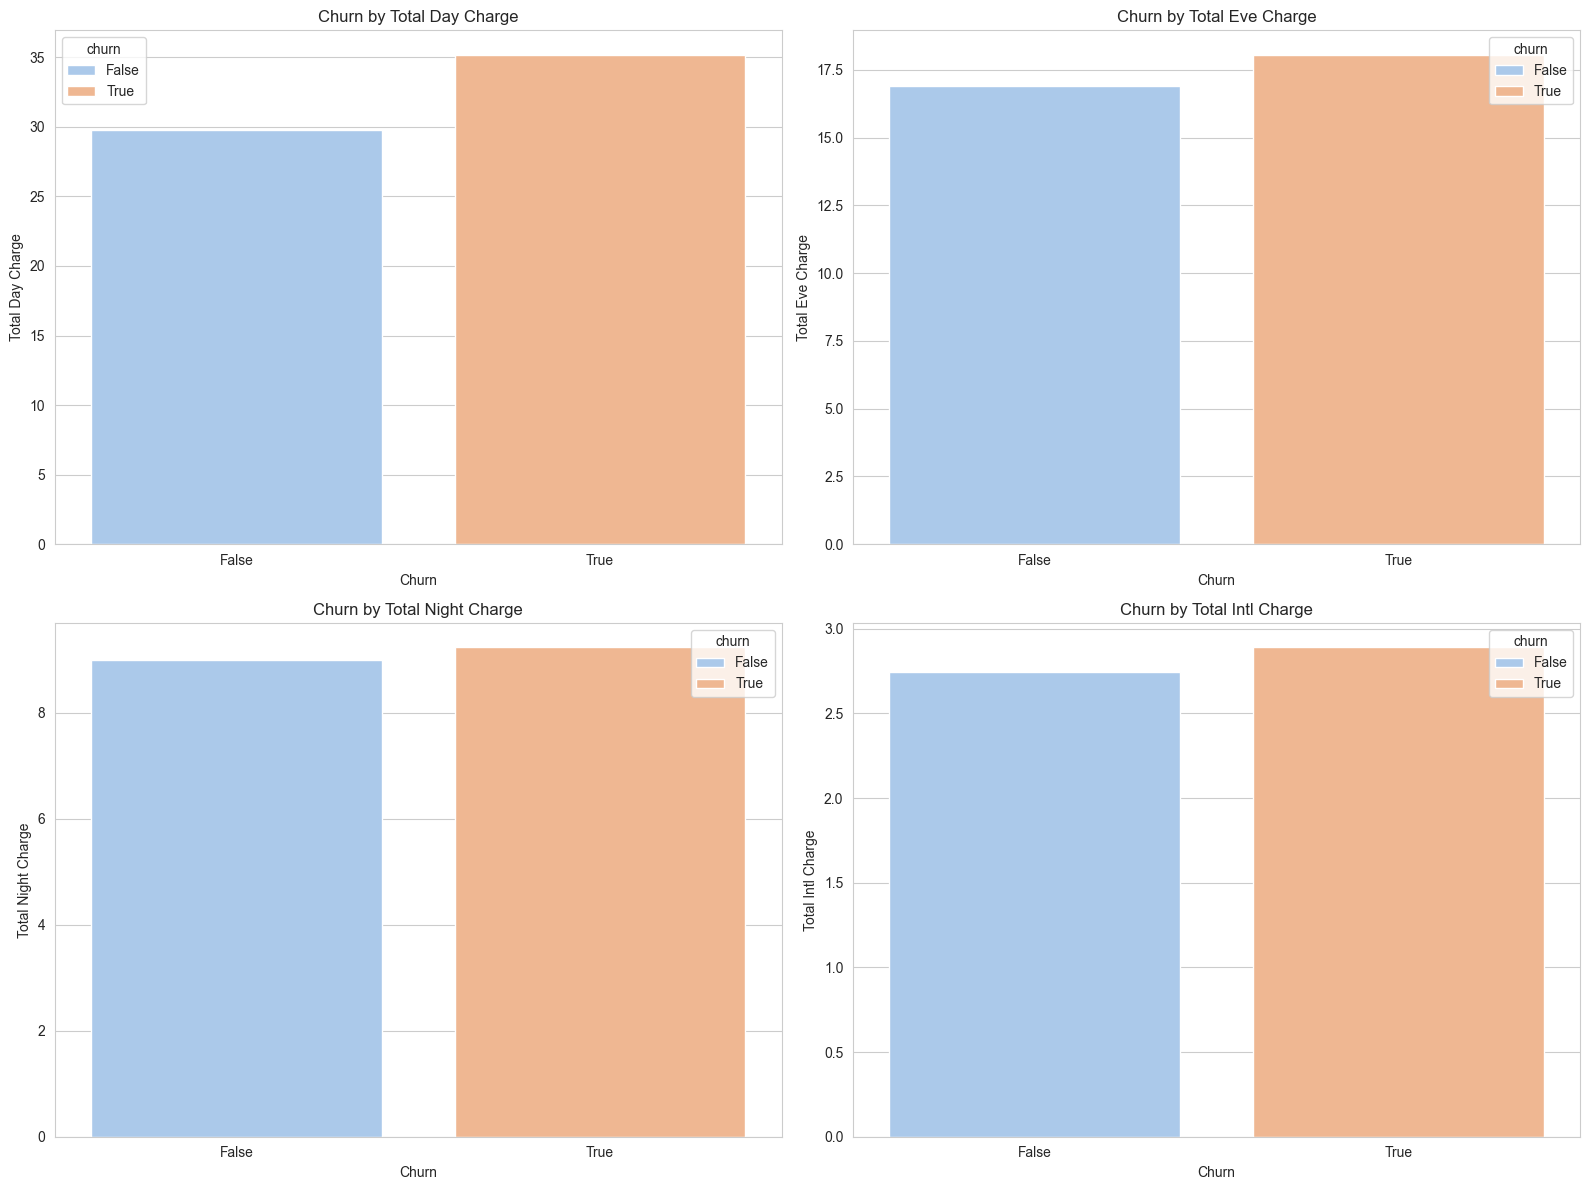

In [66]:
# Set style for plots
sns.set_style("whitegrid")

# Set up subplots
plt.figure(figsize=(16, 12))

# Total Day Charge vs. Churn
plt.subplot(2, 2, 1)
sns.barplot(x='churn', y='total day charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Day Charge')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')

# Total Eve Charge vs. Churn
plt.subplot(2, 2, 2)
sns.barplot(x='churn', y='total eve charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Eve Charge')
plt.xlabel('Churn')
plt.ylabel('Total Eve Charge')

# Total Night Charge vs. Churn
plt.subplot(2, 2, 3)
sns.barplot(x='churn', y='total night charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Night Charge')
plt.xlabel('Churn')
plt.ylabel('Total Night Charge')

# Total Intl Charge vs. Churn
plt.subplot(2, 2, 4)
sns.barplot(x='churn', y='total intl charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Intl Charge')
plt.xlabel('Churn')
plt.ylabel('Total Intl Charge')

# Adjust layout
plt.tight_layout()

plt.show()


**d)Customer Service Calls Vs Churn**

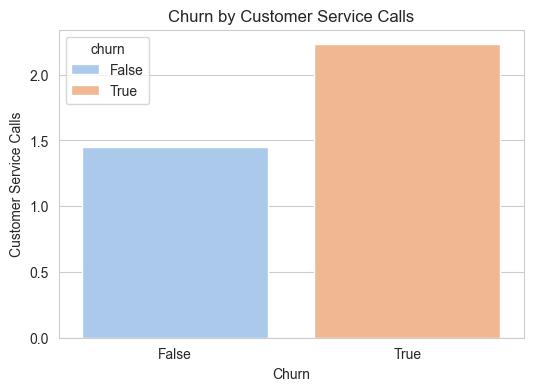

In [41]:
#Customer Service Calls vs. Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='churn', y='customer service calls', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Customer Service Calls')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.tight_layout
plt.show()

### **Multivariate Analysis**

In [54]:

#df = pd.DataFrame(data)

# Compute the correlation matrix
numerical_df = df['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge','total eve minutes', 'total eve calls', 'total eve charge',	
                  'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge',	'customer service calls']
corr = numerical_df.corr()

# Generate a mask for the upper triangle
mask = pd.DataFrame(np.tril(np.ones(corr.shape)).astype(np.bool), index=corr.index, columns=corr.columns)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Triangular Correlation Matrix')
plt.show()








# Compute the correlation matrix

KeyError: ('account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls')

# **Feature Engineering**

In [94]:
# Drop phone number column
#df.drop('phone number', axis=1, inplace=True)


# Create new features
df['account_tenure_years'] = df['account length'] // 12
df['has_intl_plan'] = df['international plan'].apply(lambda x: 1 if x == 'yes' else 0)
df['has_vmail'] = df['voice mail plan'].apply(lambda x: 1 if x == 'yes' else 0)
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df['vmail_to_call_ratio'] = df['number vmail messages'] / df['total_calls']
df['avg_charge_per_min'] = df['total_charge'] / df['total_minutes']
#df['intl_call_ratio'] = df['total_intl_calls'] / df['total_calls']
df['avg_call_duration'] = df['total_minutes'] / df['total_calls']
df['cust_serv_call_ratio'] = df['customer service calls'] / df['total_calls']
#df['area_code_prefix'] = df['area code'].apply(lambda x: str(x)[:3])
df['area_code'] = df['area code'].apply(lambda x: str(x)[:3])

# Drop phone number column
#df.drop('phone number', axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['area_code'])

# Split the data into features and target
X = df.drop('churn', axis=1)
y = df['churn']

KeyError: 'area code'

In [95]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   